# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab_final` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

<font color='magenta'>
Please comment before each cell of code using a markdown cell. You should clearly state with your own words what the portion of code in the cell bellow does or add other insightful comments on that operation. Use the html tags in this cell to add your comments in a striking color for an easy review.
</font>

### 01 - Problem (case study)

- Data Description.
- Goal.

**Data Description:**

- **customer:** Customer ID
- **state:** US State
- **customer_lifetime_value:** CLV is the client economic value for a company during all their relationship
- **response:** Response to marketing calls (customer engagement)
- **coverage:** Customer coverage type
- **education:** Customer education level
- **effective_to_date:** Effective to date
- **employmentstatus:** Customer employment status
- **gender:** Customer gender
- **income:** Customer income
- **location_code:** Customer living zone
- **marital_status:** Customer marital status
- **monthly_premium_auto:** Monthly premium
- **months_since_last_claim:** Last customer claim
- **months_since_policy_inception:** Policy Inception
- **number_of_open_complaints:** Open claims
- **number_of_policies:** Number policies
- **policy_type:** Policy type
- **policy:** Policy
- **renew_offer_type:** Renew
- **sales_channel:** Sales channel (customer-company first contact)
- **total_claim_amount:** Claims amount
- **vehicle_class:** Vehicle class
- **vehicle_size:** Vehicle size
- **vehicle_type:** Vehicle type

**Goal**: <font color='magenta'>Predict the amount that will be claimed by a client
</font>

### 02 - Getting Data

- Read the `.csv` file.

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

data = pd.read_csv("./files_for_lab_final/csv_files/marketing_customer_analysis.csv")

### 03 - Cleaning/Wrangling/EDA

- Change headers names.

In [2]:
data.columns = [e.lower().replace(' ' , '_') for e in data.columns]

<font color='magenta'>
Convertimos, mediante una expresión de list comprehensión, las mayúsculas a minúsculas y substituimos los espacios por guiones bajos, unificando así el formato de las cabeceras.
    
Forma Alternativa: Sin usar list comprehension</font>

- Deal with NaN values.

In [3]:
data=data.dropna()
data = data.drop(columns=["customer"]) #No nos interesa el ID interno que usa la empresa

<font color='magenta'>
Se puede revisar si hay NaN's con los métodos .info o .isna().sum(), pero no es necesario. Sólo con el método .dropna() ya nos aseguramos que los eliminamos, los hubiera o no en un inicio.
</font>

- Datetime Features.

**Effective To Date**

In [4]:
print(f"Original dtype: {data['effective_to_date'].dtype}\n")   # object
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])   # datetime
print(f"Meantime dtype: {data['effective_to_date'].dtype}")

print('--')
print(f"Min date: {data['effective_to_date'].min()}")         # from January 1st..
print(f"Max date: {data['effective_to_date'].max()}")         # to February 28th
print('--')

data['effective_to_date']=data['effective_to_date'].apply(lambda x: x.toordinal())   # you can change the type to ordinal.

print(f"New dtype: {data['effective_to_date'].dtype}")

Original dtype: object

Meantime dtype: datetime64[ns]
--
Min date: 2011-01-01 00:00:00
Max date: 2011-02-28 00:00:00
--
New dtype: int64


- Categorical Features.

In [5]:
# Lista de columnas categóricas

cat_cols = [col for col in data.columns if (data[col].dtype==object)]

#Información de dichas columnas

for c in cat_cols:
    print(f'Name: {data[c].name}') # Nombre
    print(f'Type: {data[c].dtype}') # Tipo
    print(f'Unique values: {len(data[c].unique())}') # Valores Únicos
    print(((data[c].value_counts() / sum(data[c].value_counts()))*100)) #Porcentaje de veces que aparece cada una respecto al total de la columna
    

Name: state
Type: object
Unique values: 5
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64
Name: response
Type: object
Unique values: 2
No     85.679877
Yes    14.320123
Name: response, dtype: float64
Name: coverage
Type: object
Unique values: 3
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64
Name: education
Type: object
Unique values: 5
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64
Name: employmentstatus
Type: object
Unique values: 5
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: employmentstatus, dtype: float64
Name: gender
Type: object
Unique values: 2
F    50.996278
M    49.003722
Name: gend

<font color='magenta'>
Otra vez con list comprehension, nos quedamos con las columnas categóricas en base a si son tipo object y luego mostramos diversa información sobre éstas.
</font>

- Numerical Features.

In [6]:
num_cols = [c for c in data.columns if (data[c].dtype!='object') and (c!='Effective To Date')]

<font color='magenta'>
Nos quedamos con las columnas que no son tipo object ni tipo fecha
</font>

- Exploration.

**Bar plot for each categorical variable.**

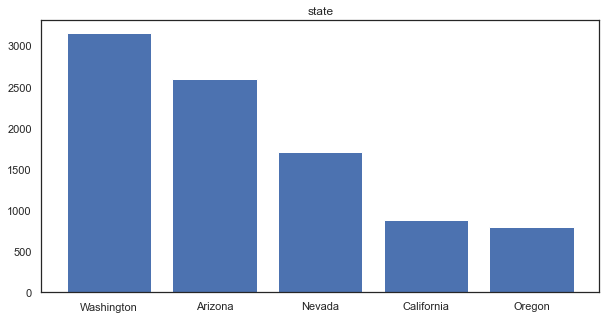

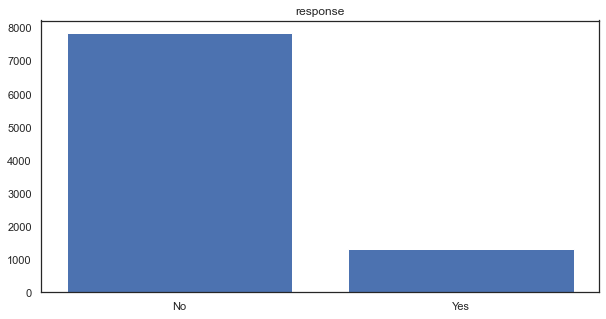

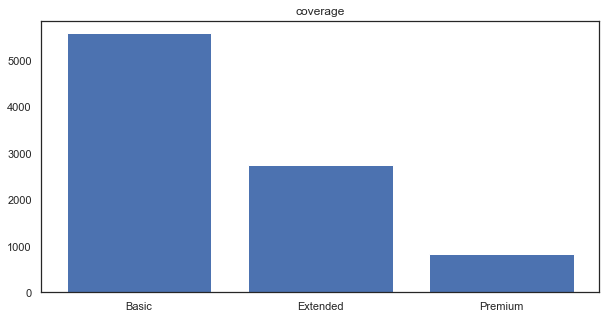

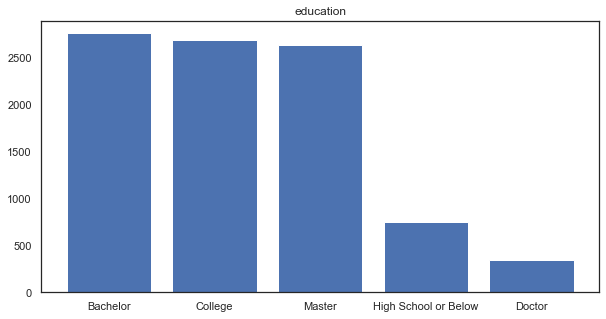

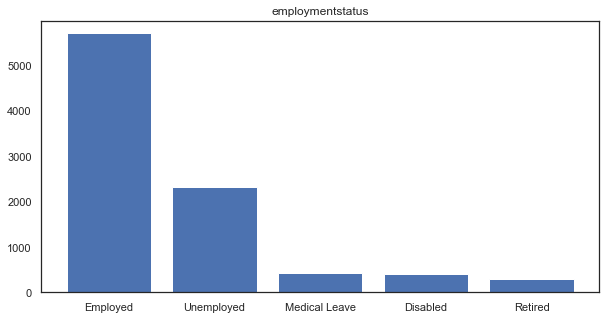

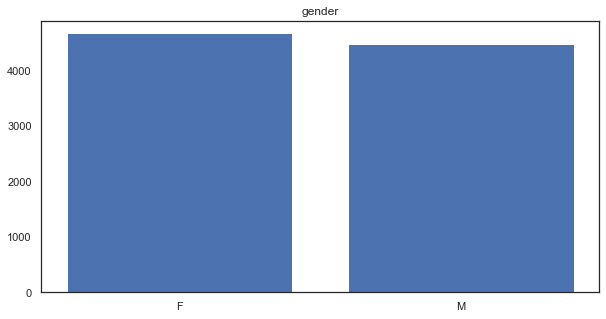

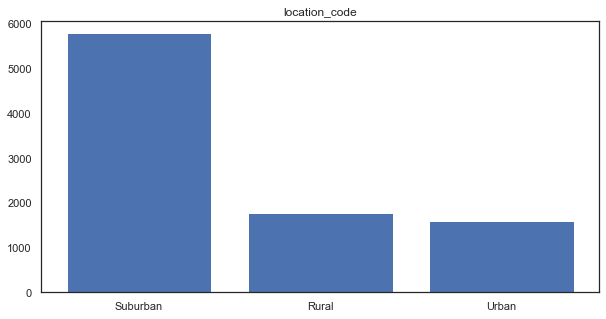

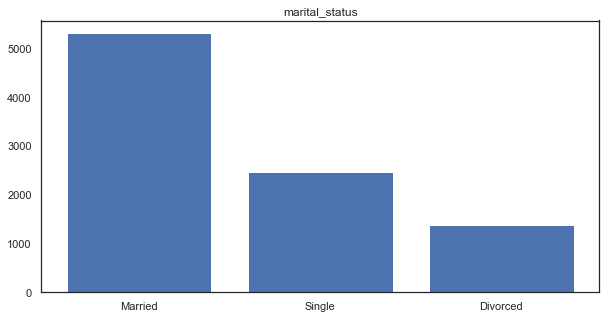

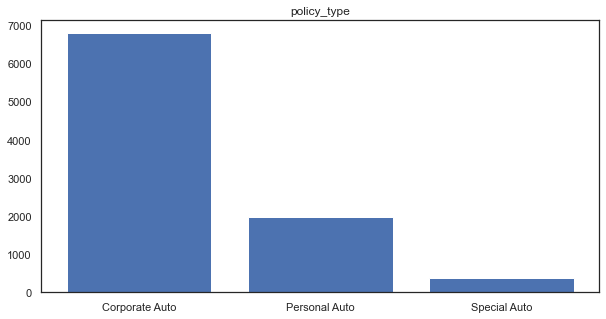

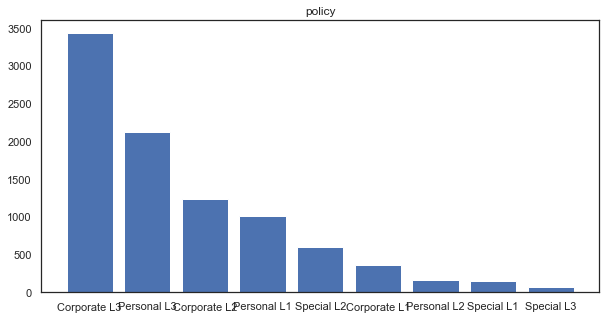

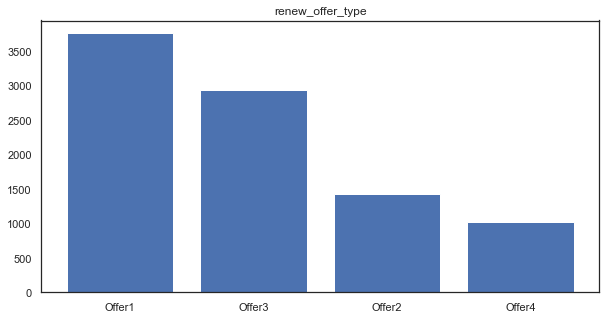

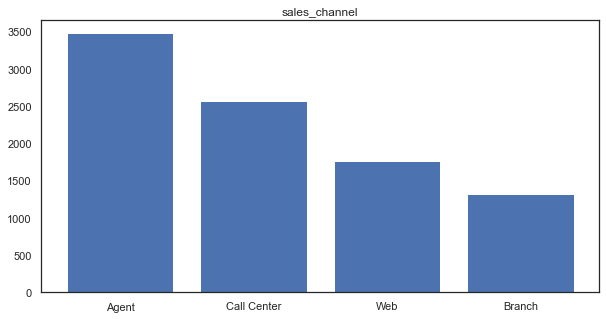

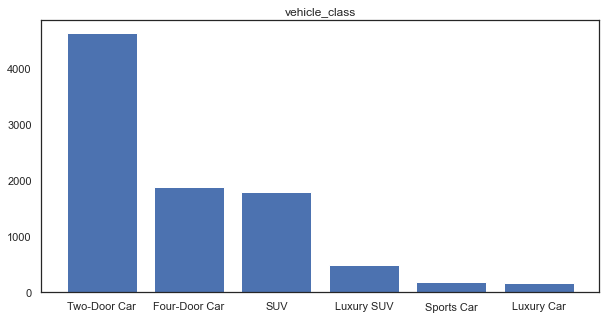

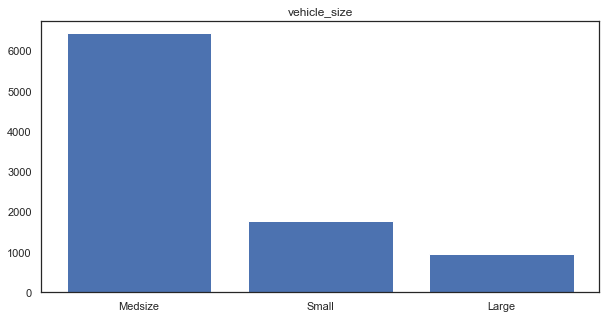

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
%matplotlib inline

for c in cat_cols:
    plt.figure(figsize=(10,5))
    plt.bar(data[c].unique(), data[c].value_counts())
    plt.title(c)
    plt.show();

C:\Users\EB885UN\AppData\Local\Temp\ipykernel_12000\129339137.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(corr, dtype=np.bool))     # generate a mask for the upper triangle


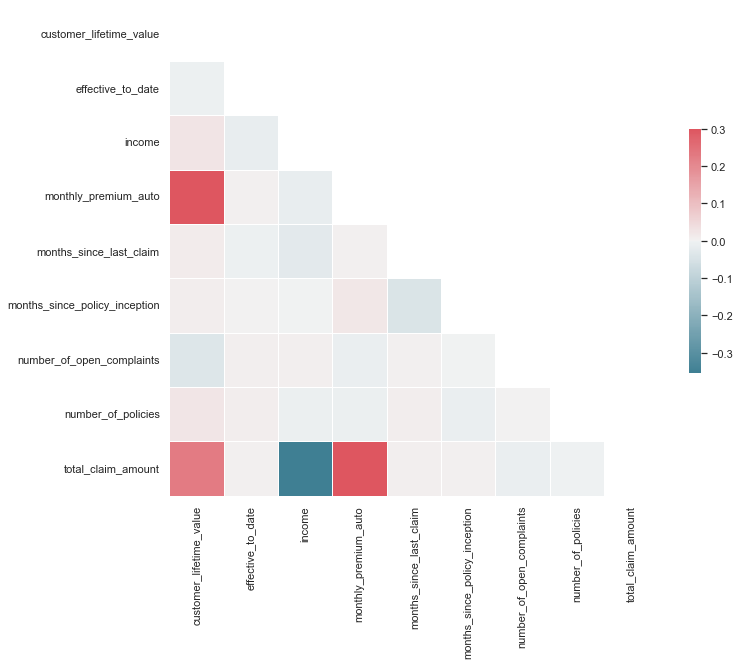

In [8]:
import numpy as np    # numerical python, algebra library


corr=data.corr()      # compute the correlation matrix


mask=np.triu(np.ones_like(corr, dtype=np.bool))     # generate a mask for the upper triangle

f, ax=plt.subplots(figsize=(11, 9))                 # set up the matplotlib figure

cmap=sns.diverging_palette(220, 10, as_cmap=True)   # generate a custom diverging colormap

sns.heatmap(corr, mask=mask, cmap=cmap,             # draw the heatmap with the mask and correct aspect ratio
            vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5});

<font color='magenta'>
Vemos los gráficos de distribución para ver como se comportan las variables (por si hay que aplicar logaritmos o quitar outliers) y una matriz de correlación entre ellas para ver si podemos descartar algunas (las que tengan una correlación superior a un listón)

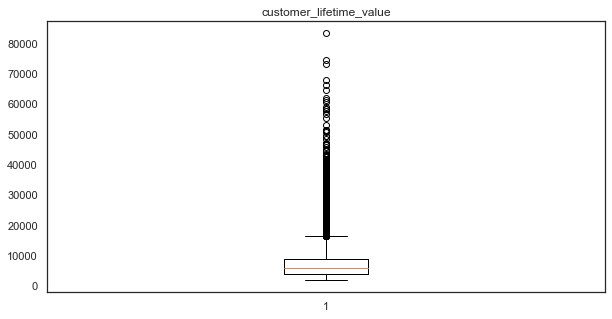

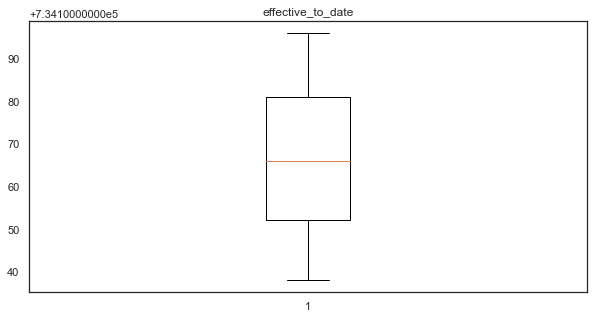

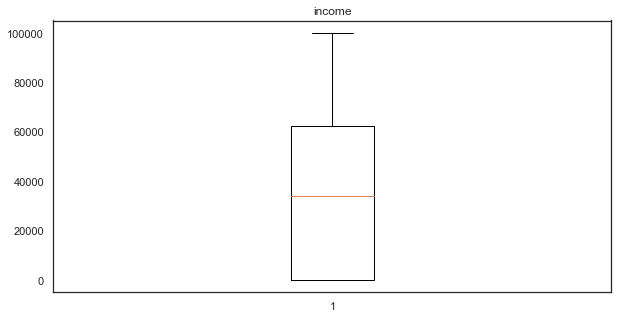

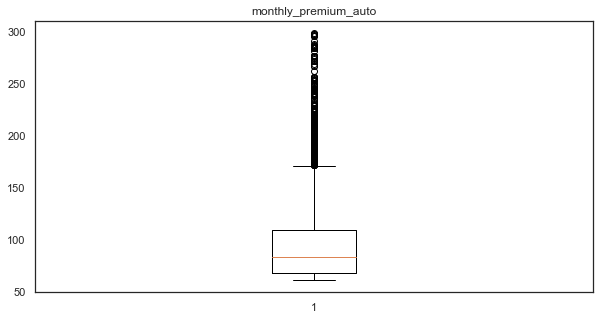

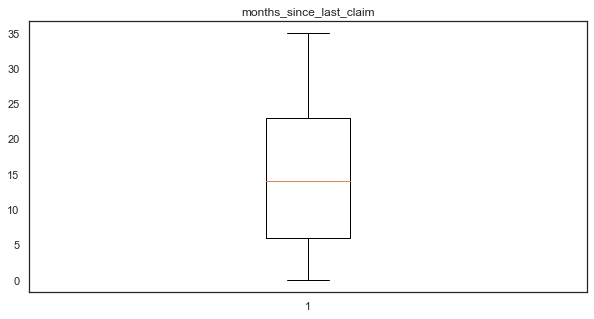

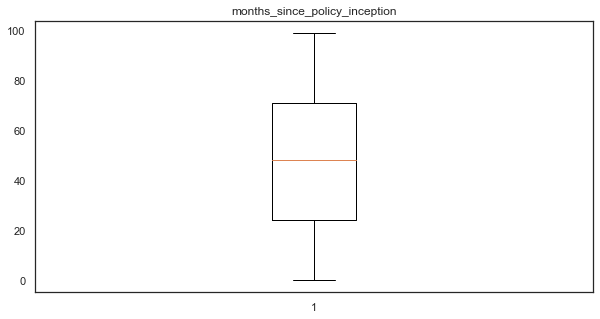

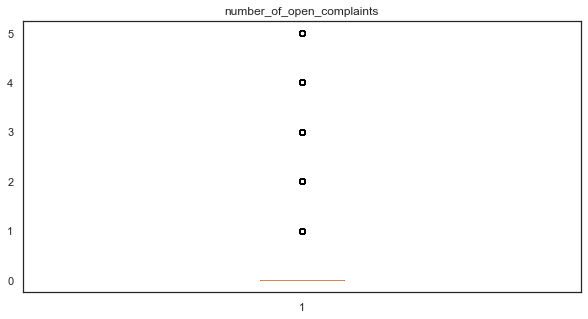

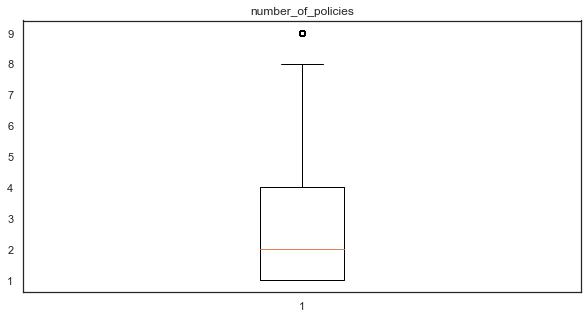

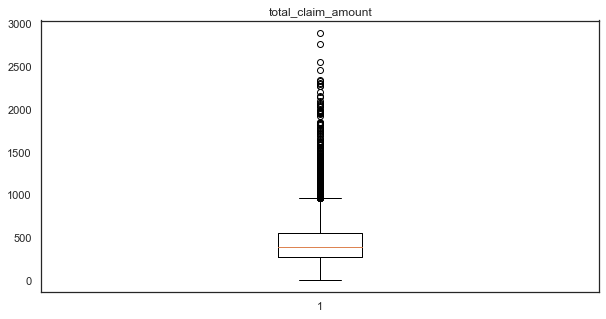

In [9]:
for c in num_cols:
    plt.figure(figsize=(10,5))
    plt.boxplot(data[c])
    plt.title(c)
    plt.show();

<font color='magenta'>
En línea con los gráficos de distribución, con los boxplot podemos sacar las mismas conclusiones pero con las variables numéricas (aplicar logaritmos u otro tipo de conversión y decidir si se quitarán outliers)

### 04 - Processing Data

- Dealing with outliers.

In [10]:
# e.g. 3*IQR in a column

#q1=np.percentile(data['customer_lifetime_value'], 25)   # percentile 25
#q3=np.percentile(data['customer_lifetime_value'], 75)   # percentile 75

#iqr=q3-q1  # IQR

#upper=q3+3*iqr   # upper boundary
#lower=q1-3*iqr   # lower boundary

<font color='magenta'>
Definimos, para la variable customer lifetime value, los límites a partir de los cuales descartaríamos la informacón. En este caso, el filtrado no está aplicado, pero habría que quedarse lo que queda dentro del rango que limitan los dos límites.

<font color='magenta'>
La mejora propuesta para el código es no quitar ouliers, sino aplicar una transformación logarítmica de la información

In [11]:
def log_transfom_clean1(x):
    x = np.log(x)
    if np.isfinite(x): #para protegernos del hecho de que log(0) = infinito
        return x
    else:
        return 0

data['customer_lifetime_value_log'] = list(map(log_transfom_clean1, data['customer_lifetime_value']))
data.drop(columns='customer_lifetime_value')

,state,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,customer_lifetime_value_log
0,Washington,No,Basic,Bachelor,734192,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260
1,Arizona,No,Extended,Bachelor,734168,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738
2,Nevada,No,Premium,Bachelor,734187,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008
3,California,No,Basic,Bachelor,734157,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920
4,Washington,No,Basic,Bachelor,734171,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,734178,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,10.060747
9130,California,Yes,Extended,College,734180,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,8.038031
9131,California,No,Extended,Bachelor,734174,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,9.007476
9132,California,No,Extended,College,734171,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,8.925912


- Normalization.

In [12]:
from sklearn.preprocessing import MinMaxScaler

data['effective_to_date']=MinMaxScaler().fit_transform(data['effective_to_date'].values.reshape(-1, 1))

data['effective_to_date'].head()

0    0.931034
1    0.517241
2    0.844828
3    0.327586
4    0.568966
Name: effective_to_date, dtype: float64

<font color='magenta'>
Reescalamos la columna fecha a un rango entre -1 y 1

In [13]:
from sklearn.preprocessing import StandardScaler

for c in num_cols[:-1]:   # we'll normalize all less the target column
    data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))

<font color='magenta'>
Reescalamos todas las columnas numéricas al mismo estilo que antes la fecha, dejándolas en un rango entre -1 y 1.

- Encoding Categorical Data.

In [14]:
one_hot_data=pd.get_dummies(data[cat_cols], drop_first=True)   # one hot encoding categorical variables

<font color='magenta'>
Para las columnas categóricas, las separamos en tantas columnas como valores únicos tienen para que puedan quedar codificadas con ceros y unos únicamente y darles las mismas propiedades que a las numéricas

In [15]:
data=pd.concat([data, one_hot_data], axis=1)   # concat dataframes
data.drop(columns=cat_cols, inplace=True)

<font color='magenta'>
Las empalmamos al dataframe y borramos las categóricas originales

- Splitting into train set and test set.

In [16]:
# first, split X-y (learning-target data)
X=data.drop(columns=['total_claim_amount'])
y=data['total_claim_amount']

# checking shape
print(X.shape)
print(y.shape)

# train_test_split
from sklearn.model_selection import train_test_split as tts

# train-test-split (4 sets)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)  # random state fixed sample

(9134, 52)
(9134,)


<font color='magenta'>
Separamos toda la información en dos DataFrames, uno que servirá para entrenar al modelo (train) y otro para ponerlo a prueba (test)

### 05 - Modeling

- Apply model.

**Linear Regression**

In [17]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)   # model prediction

**Regularization**

In [18]:
from sklearn.linear_model import Lasso       # L1
from sklearn.linear_model import Ridge       # L2
from sklearn.linear_model import ElasticNet  # L1+L2

# Lasso L1

lasso=Lasso()
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

In [19]:
# Ridge L2

ridge=Ridge()
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [20]:
# ElasticNet L1+L2

elastic=ElasticNet()
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)

**Random Forest Regressor**

In [21]:
from sklearn.ensemble import RandomForestRegressor as RFR

rfr=RFR()
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

**XGBoost**

In [22]:
from xgboost import XGBRegressor as XGBR

xgbr=XGBR()
xgbr.fit(X_train, y_train)

y_pred_xgbr = xgbr.predict(X_test)

C:\Users\EB885UN\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\EB885UN\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


**LightGBM**

In [23]:
from lightgbm import LGBMRegressor as LGBMR

lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)

y_pred_lgbmr = lgbmr.predict(X_test)

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

In [24]:
models=[linreg, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names=['linreg', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]

In [25]:
for i in range(len(models)):

    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

    from sklearn.metrics import mean_squared_error as mse

for i in range(len(models)):

    train_mse=mse(models[i].predict(X_train), y_train) #MSE
    test_mse=mse(preds[i], y_test)

    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

for i in range(len(models)):

    train_rmse=mse(models[i].predict(X_train), y_train)**0.5 #RMSE
    test_rmse=mse(preds[i], y_test)**0.5

    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))
    
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train) #MAE
    test_mae=mae(preds[i], y_test)

    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))


Model: linreg, train R2: 0.7743104933661715 -- test R2: 0.7626241870121578
Model: lasso, train R2: 0.7715826967448204 -- test R2: 0.7641349369878327
Model: ridge, train R2: 0.7743097905274283 -- test R2: 0.7626546772281854
Model: elastic, train R2: 0.5902260092738644 -- test R2: 0.5740797698810313
Model: rfr, train R2: 0.9777628699372793 -- test R2: 0.8239162145559553
Model: xgbr, train R2: 0.9700852137556878 -- test R2: 0.8152809199281833
Model: lgbmr, train R2: 0.9179461550318032 -- test R2: 0.8274421958815128
Model: linreg, train MSE: 19308.10847628691 -- test MSE: 18873.99794394276
Model: lasso, train MSE: 19541.47596355671 -- test MSE: 18753.87664103579
Model: ridge, train MSE: 19308.16860529733 -- test MSE: 18871.57363513315
Model: elastic, train MSE: 35056.83884779822 -- test MSE: 33865.360781137264
Model: rfr, train MSE: 1902.423049508118 -- test MSE: 14000.605043121115
Model: xgbr, train MSE: 2559.259163020115 -- test MSE: 14687.206306318287
Model: lgbmr, train MSE: 7019.84138

<font color='magenta'>
La modificación planteada (aplicar transformación logarítmica en vez de quitar outliers) ha conseguido una mejor R2 (de 0,8248 a 0,8274) y MAE (de 74,0791 a 73,9128)